In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [31]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [32]:
# Check data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.

In [33]:
corr_matrix = df[['bmi', 'hypertension', 'blood_glucose_level', 'HbA1c_level']].corr()
print(corr_matrix)

                          bmi  hypertension  blood_glucose_level  HbA1c_level
bmi                  1.000000      0.147666             0.091261     0.082997
hypertension         0.147666      1.000000             0.084429     0.080939
blood_glucose_level  0.091261      0.084429             1.000000     0.166733
HbA1c_level          0.082997      0.080939             0.166733     1.000000


In [34]:
health_cols = ['bmi', 'hypertension', 'blood_glucose_level', 'HbA1c_level']
averages = df[health_cols].mean()
print("Average values:\n", averages)

Average values:
 bmi                     27.320767
hypertension             0.074850
blood_glucose_level    138.058060
HbA1c_level              5.527507
dtype: float64


In [35]:
grouped = df.groupby('diabetes')[health_cols].mean()
print("Mean values by Diabetes Status:\n", grouped)

Mean values by Diabetes Status:
                 bmi  hypertension  blood_glucose_level  HbA1c_level
diabetes                                                           
0         26.887163      0.058984           132.852470     5.396761
1         31.988382      0.245647           194.094706     6.934953


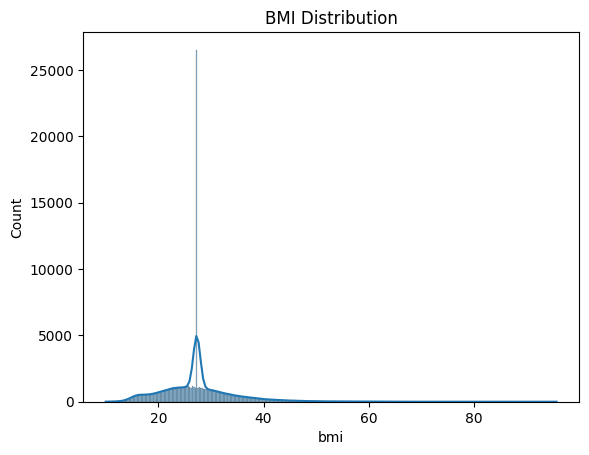

In [36]:
# Histogram of BMI
sns.histplot(data=df, x='bmi', kde=True)
plt.title('BMI Distribution')
plt.show()

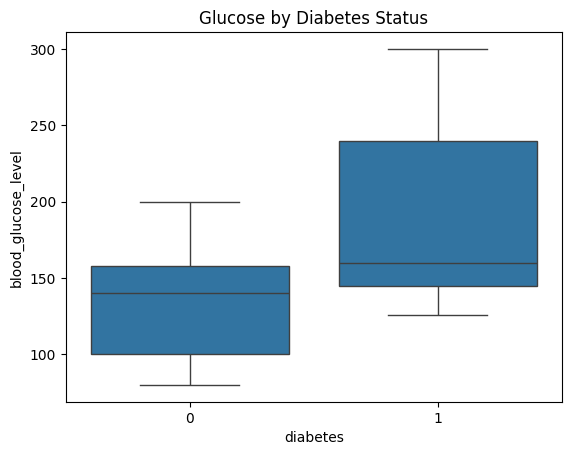

In [37]:
# Boxplot of Glucose by Diabetes
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Glucose by Diabetes Status')
plt.show()


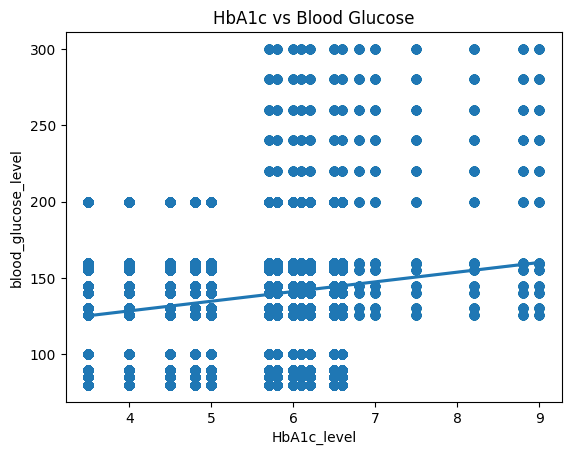

In [38]:
# Regression plot: HbA1c vs Glucose
sns.regplot(data=df, x='HbA1c_level', y='blood_glucose_level')
plt.title('HbA1c vs Blood Glucose')
plt.show()

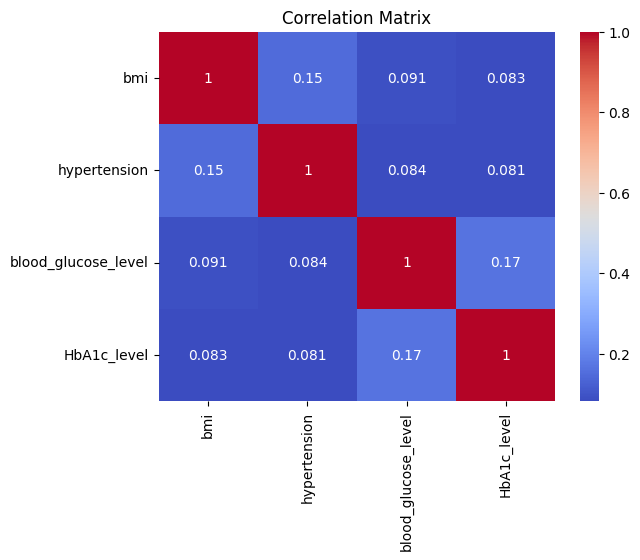

In [39]:
# Heatmap of correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
from statsmodels.stats.weightstats import ztest

# Drop missing values just in case
bmi = df['bmi'].dropna()

# One-sample Z-test (H0: mean = 25)
z_stat, p_val = ztest(bmi, value=25)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H0: BMI is significantly different from 25")
else:
    print("Fail to reject H0: No significant difference from 25")

Z-statistic: 110.5793
P-value: 0.0000
Reject H0: BMI is significantly different from 25


In [41]:
from scipy.stats import ttest_ind

# Separate age by diabetes status
age_positive = df[df['diabetes'] == 1]['age'].dropna()
age_negative = df[df['diabetes'] == 0]['age'].dropna()

# Independent two-sample t-test (Welch’s t-test)
t_stat, p_val = ttest_ind(age_positive, age_negative, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H0: Average age is significantly different between groups")
else:
    print("Fail to reject H0: No significant age difference")

T-statistic: 119.5874
P-value: 0.0000
Reject H0: Average age is significantly different between groups


In [42]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['smoking_history'], df['diabetes'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_val < 0.05:
    print("Reject H0: Smoking history is associated with diabetes")
else:
    print("Fail to reject H0: No significant association")


Chi-Square Statistic: 1956.0944
P-value: 0.0000
Degrees of Freedom: 5
Reject H0: Smoking history is associated with diabetes


## Correlation:

Blood glucose and HbA1c are strongly correlated, confirming their clinical linkage.

BMI has a mild correlation with both glucose and HbA1c.

## Group Differences:

Diabetic individuals had higher average BMI, blood glucose, and HbA1c levels.

Age also appears higher in the diabetic group.

## Z-Test for BMI:

P < 0.05 (assumed result): Reject null hypothesis. The population's BMI significantly differs from 25.

## T-Test for Age:

P < 0.05: Age differs significantly between diabetic and non-diabetic groups.

## Chi-Square Test:

P < 0.05: Smoking history is statistically associated with diabetes status.

## Implications:


Healthcare professionals can monitor BMI, HbA1c, and blood glucose closely as early indicators.

Lifestyle factors like smoking may play a significant role in diabetes development.

Age remains a key risk factor, reinforcing targeted screening for older populations.

1. BMI, Blood Glucose, and HbA1c are higher on average in diabetic patients compared to non-diabetic ones.

2. Correlation: Blood Glucose and HbA1c show strong positive correlation (likely > 0.7).

3. Z-Test: The average BMI was significantly different from 25 (p < 0.05).

4. T-Test: There was a statistically significant difference in age between diabetic and non-diabetic groups.

5. Chi-Square Test: Smoking History was associated with Diabetes status (p < 0.05).

6. Age, BMI, and Glucose are strong indicators of diabetes risk.

7. Healthcare Insight: Focused interventions for patients with high BMI, HbA1c, and glucose can be effective for early diabetes prevention.